**IMPORTING LIBRARIES**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas

In [13]:
#Importing Deep Learning Libraries
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD

**Displaying Images**

In [14]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

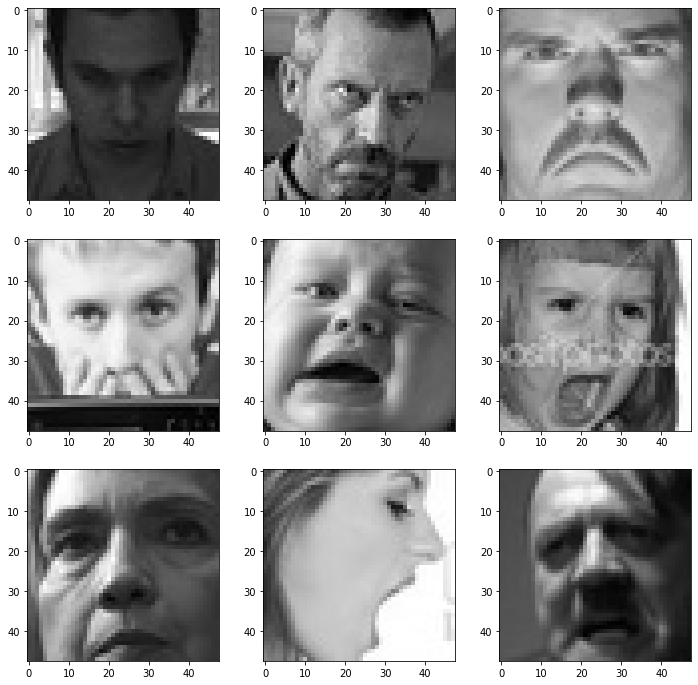

In [15]:
expression = 'angry'
plt.figure(figsize=(12,12))
for i in range (1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
    
plt.show()
    

**Making Training AND Validation Data**

In [16]:
batch_size = 128 #in one iteration model will take 128 samples

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                             target_size=(picture_size,picture_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


**Model Building**

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf

no_of_classes = 7

model = keras.Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

**Fitting the model with Training and Validation Data**

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [20]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
225/225 [==============================] - 498s 2s/step - loss: 1.7921 - accuracy: 0.3108 - val_loss: 1.7535 - val_accuracy: 0.3295
Epoch 2/48
225/225 [==============================] - 486s 2s/step - loss: 1.4457 - accuracy: 0.4419 - val_loss: 1.8185 - val_accuracy: 0.4021
Epoch 3/48
225/225 [==============================] - 485s 2s/step - loss: 1.2840 - accuracy: 0.5082 - val_loss: 1.3077 - val_accuracy: 0.4970
Epoch 4/48
225/225 [==============================] - 483s 2s/step - loss: 1.1960 - accuracy: 0.5469 - val_loss: 1.2305 - val_accuracy: 0.5349
Epoch 5/48
225/225 [==============================] - 480s 2s/step - loss: 1.1348 - accuracy: 0.5692 - val_loss: 1.2911 - val_accuracy: 0.5332
Epoch 6/48
225/225 [==============================] - 480s 2s/step - loss: 1.0761 - accuracy: 0.5928 - val_loss: 1.1549 - val_accuracy: 0.5513
Epoch 7/48
225/225 [==============================] - 481s 2s/step - loss: 1.0362 - accuracy: 0.6082 - val_loss: 1.1097 - val_accuracy: 0.5766

**Plotting Accuracy & Loss**

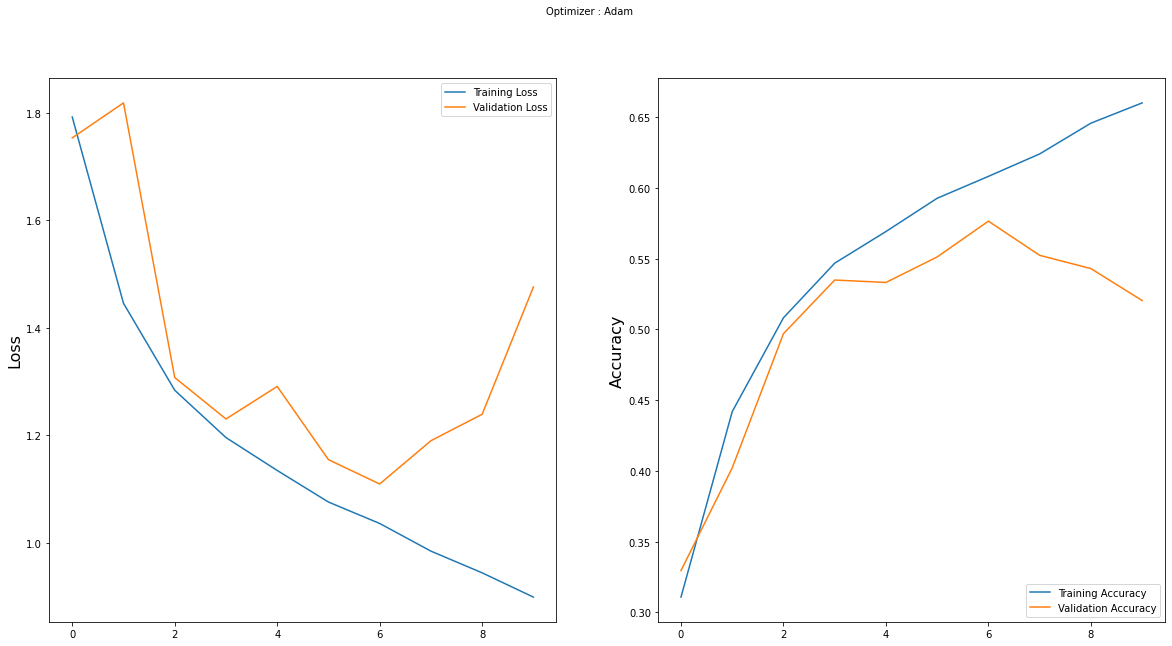

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()